In [58]:
import pandas as pd


data = pd.read_csv('/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241028.csv')

In [59]:
data.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,01/07/2019,15987,9962,407,21223,3715,NaN
1,30/08/2024,16436,10705,225,19026,3925,59.0
2,15/09/2023,15499,10671,267,18421,4519,61.0
3,28/12/2021,1756,2352,0,3775,0,13.0
4,11/01/2023,10536,8347,223,14072,0,48.0


In [60]:
data.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1916.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,42.983299
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.760110
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,39.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [61]:
# Checking for missing values
missing_values = data.isnull().sum()

# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Summary statistics
summary_stats = data.describe()

missing_values, summary_stats


(Date            0
 Local Route     0
 Light Rail      0
 Peak Service    0
 Rapid Route     0
 School          0
 Other           2
 dtype: int64,
                       Date   Local Route    Light Rail  Peak Service  \
 count                 1918   1918.000000   1918.000000   1918.000000   
 mean   2022-02-13 12:00:00   9891.395203   7195.446298    179.581335   
 min    2019-07-01 00:00:00      1.000000      0.000000      0.000000   
 25%    2020-10-22 06:00:00   3044.500000   4463.500000      0.000000   
 50%    2022-02-13 12:00:00  11417.000000   7507.000000    193.000000   
 75%    2023-06-07 18:00:00  15517.500000  10008.250000    313.750000   
 max    2024-09-29 00:00:00  21070.000000  15154.000000   1029.000000   
 std                    NaN   6120.715714   3345.616428    156.532738   
 
         Rapid Route       School        Other  
 count   1918.000000  1918.000000  1916.000000  
 mean   12597.213243  2352.694995    42.983299  
 min        0.000000     0.000000     0.000000

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Other'].fillna(0, inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

<ipython-input-62-5479f908ea77>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Other'].fillna(0, inplace=True)


In [63]:
# Checking for missing values
missing_values = data.isnull().sum()
# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)
# Summary statistics
summary_stats = data.describe()

missing_values, summary_stats


(Date            0
 Local Route     0
 Light Rail      0
 Peak Service    0
 Rapid Route     0
 School          0
 Other           0
 dtype: int64,
         Local Route    Light Rail  Peak Service   Rapid Route       School  \
 count   1918.000000   1918.000000   1918.000000   1918.000000  1918.000000   
 mean    9891.395203   7195.446298    179.581335  12597.213243  2352.694995   
 std     6120.715714   3345.616428    156.532738   6720.494557  2494.766306   
 min        1.000000      0.000000      0.000000      0.000000     0.000000   
 25%     3044.500000   4463.500000      0.000000   6383.000000     0.000000   
 50%    11417.000000   7507.000000    193.000000  13106.500000   567.500000   
 75%    15517.500000  10008.250000    313.750000  17924.750000  4914.000000   
 max    21070.000000  15154.000000   1029.000000  28678.000000  7255.000000   
 
              Other  
 count  1918.000000  
 mean     42.938478  
 std      41.761381  
 min       0.000000  
 25%      14.000000  
 50%   

## **Visualization of dataset for months August, September, October respect to Year**

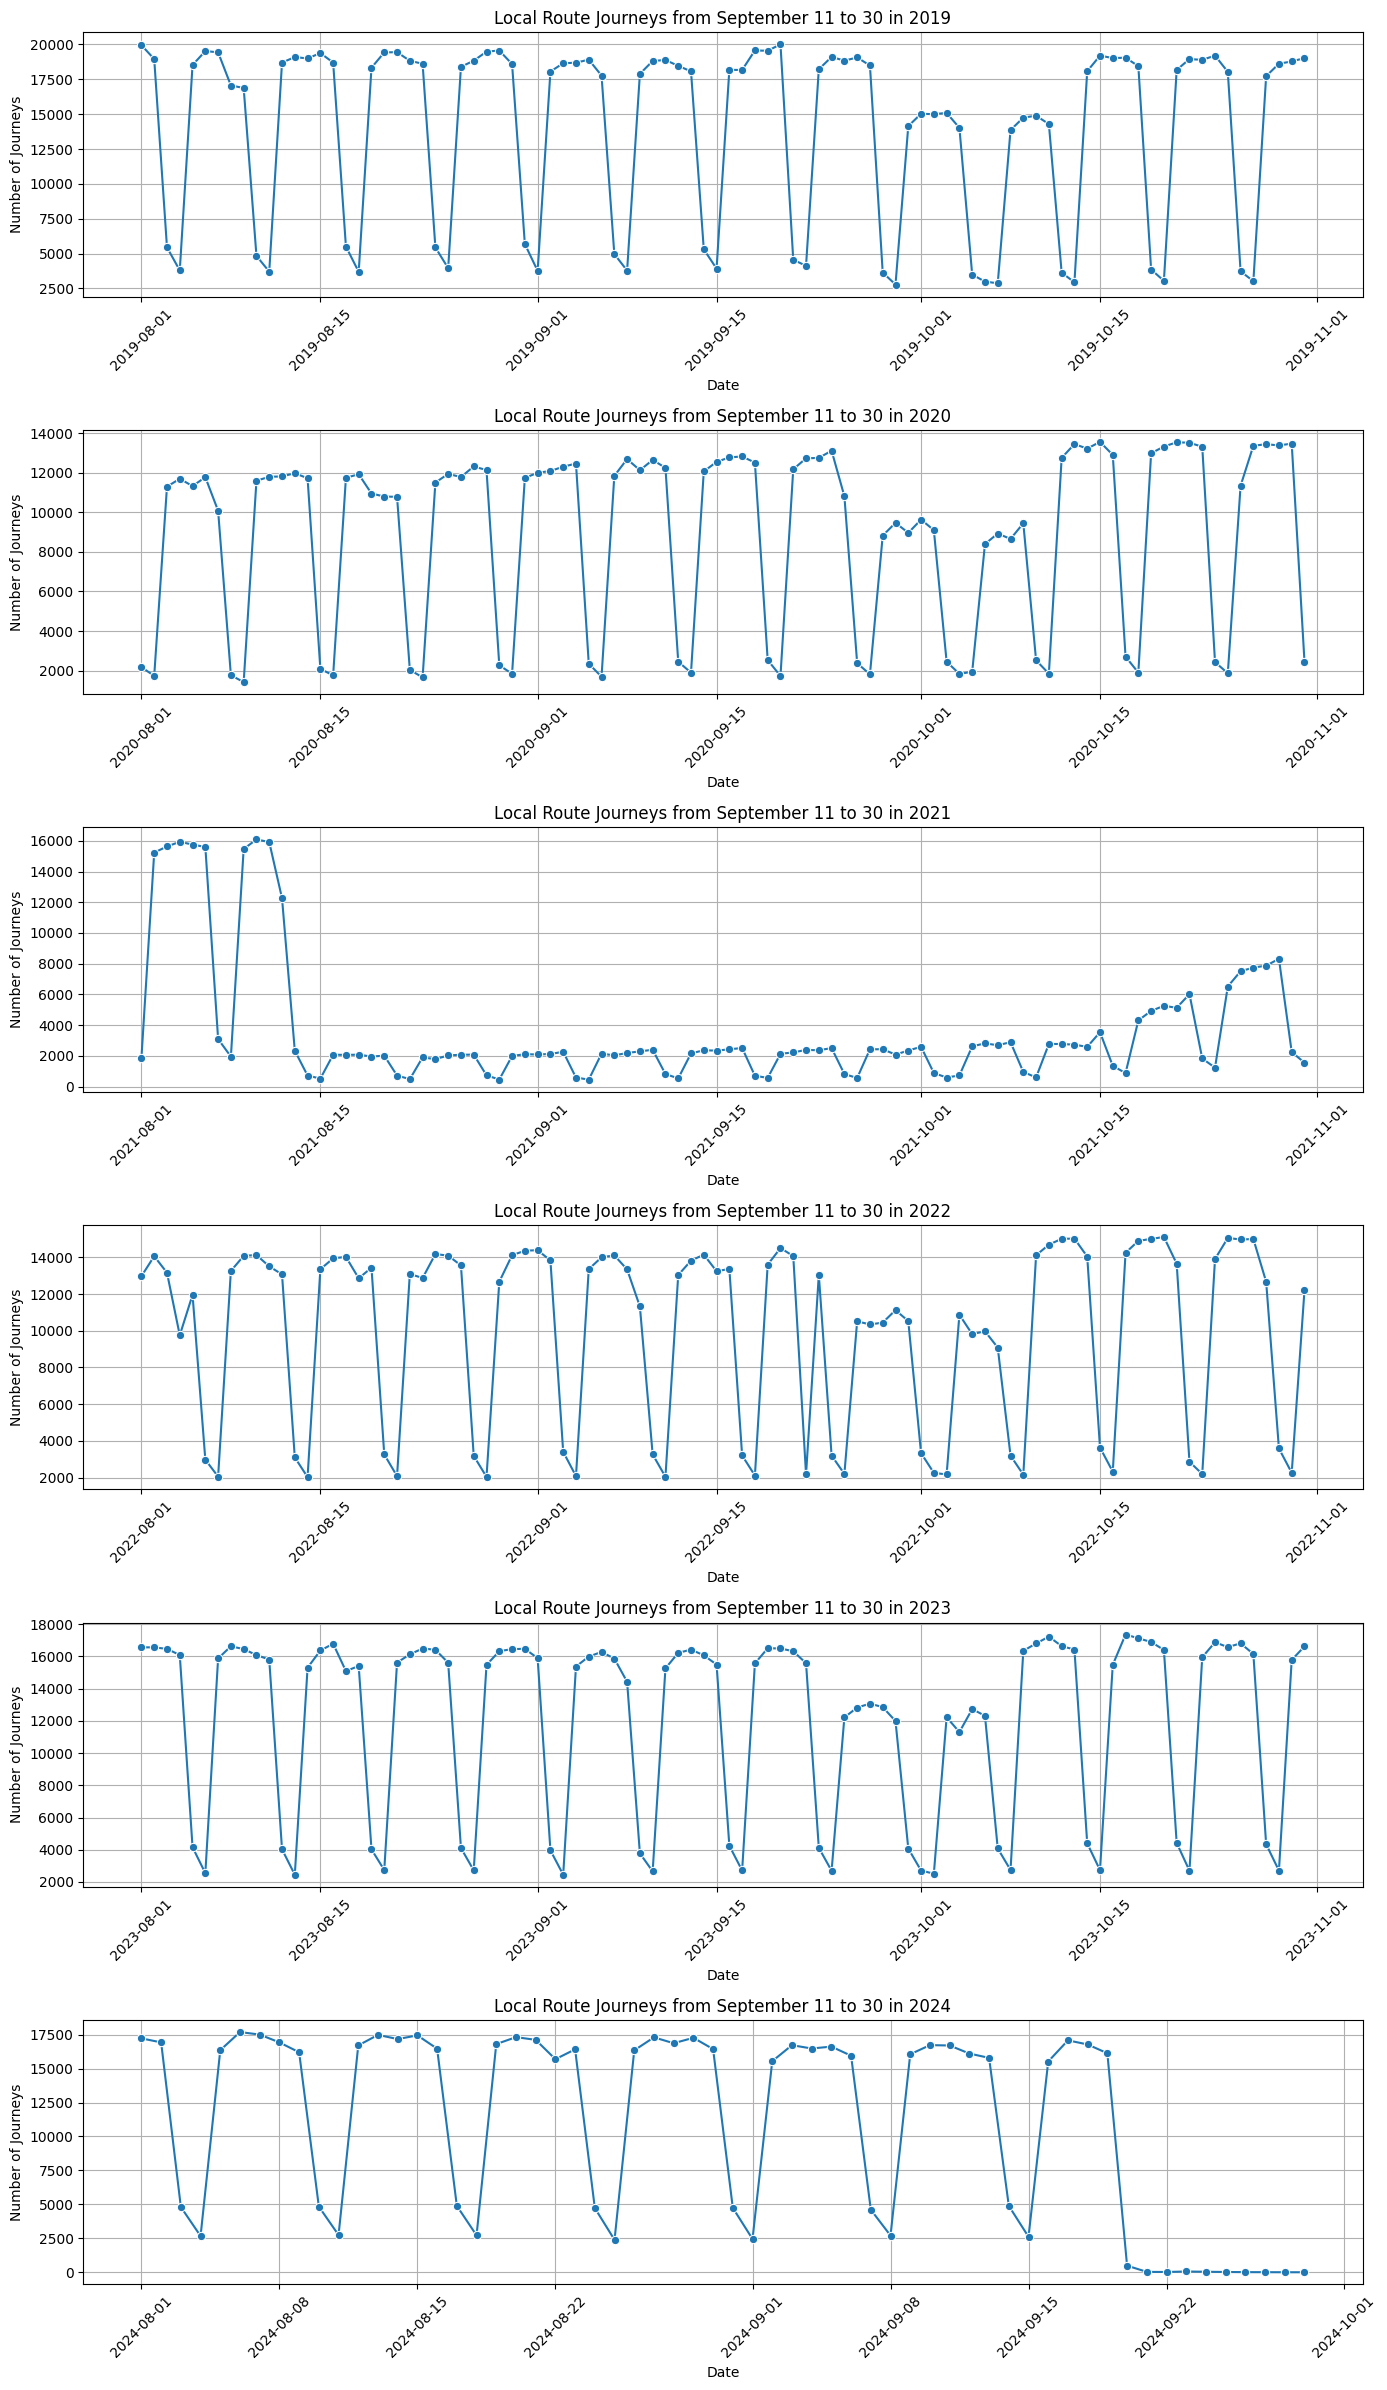

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract the year, month, and day from the 'Date' column
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

# Filter for the month
data_filtered = data[data['Month'].isin([8, 9, 10])]

# Get the unique years present in the filtered dataset
years = data_filtered['Year'].unique()

# Create line plots for each year for the filtered data using Seaborn
plt.figure(figsize=(14, len(years) * 4))  # Adjust figure size based on number of years
for i, year in enumerate(sorted(years)):
    plt.subplot(len(years), 1, i + 1)  # Create a subplot for each year
    year_data = data_filtered[data_filtered['Year'] == year]

    # Plot the 'Local Route' journeys for September days 11-30 using Seaborn
    sns.lineplot(x=year_data.index, y=year_data['Local Route'], marker='o')

    # Set title and labels
    plt.title(f'Local Route Journeys from September 11 to 30 in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Journeys')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between plots
plt.show()


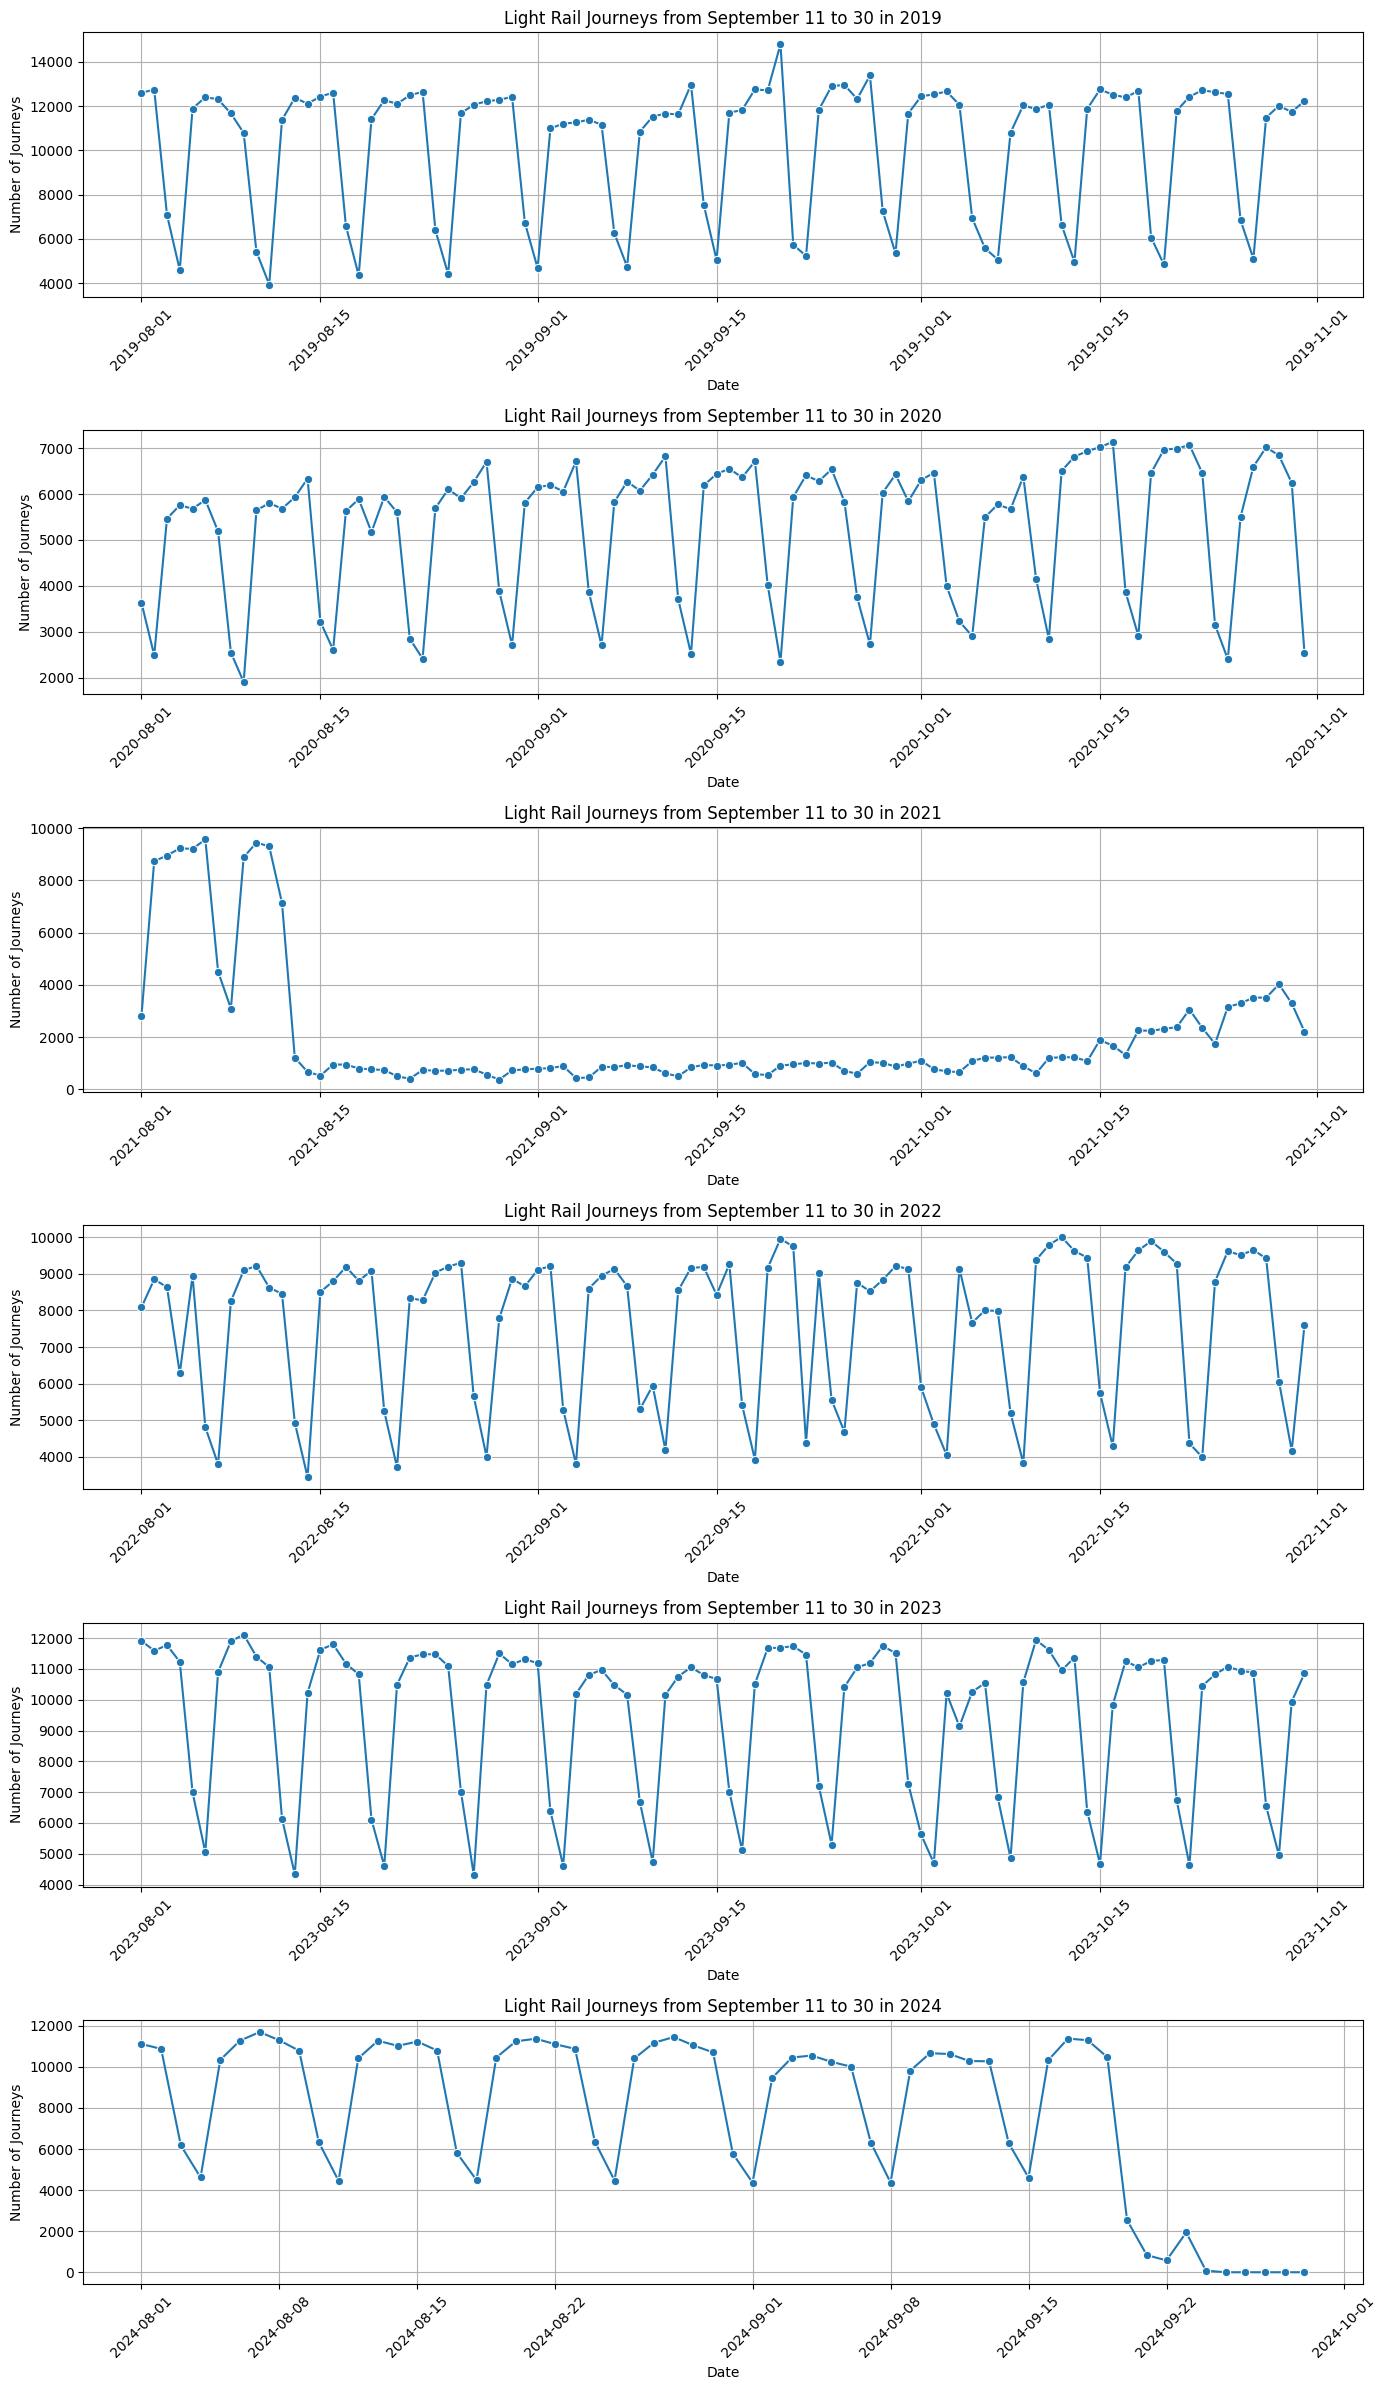

In [65]:
# Create line plots for each year for the filtered data using Seaborn
plt.figure(figsize=(14, len(years) * 4))  # Adjust figure size based on number of years
for i, year in enumerate(sorted(years)):
    plt.subplot(len(years), 1, i + 1)  # Create a subplot for each year
    year_data = data_filtered[data_filtered['Year'] == year]

    # Plot the 'Light Rail' journeys for September days 11-30 using Seaborn
    sns.lineplot(x=year_data.index, y=year_data['Light Rail'], marker='o')

    # Set title and labels
    plt.title(f'Light Rail Journeys from September 11 to 30 in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Journeys')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

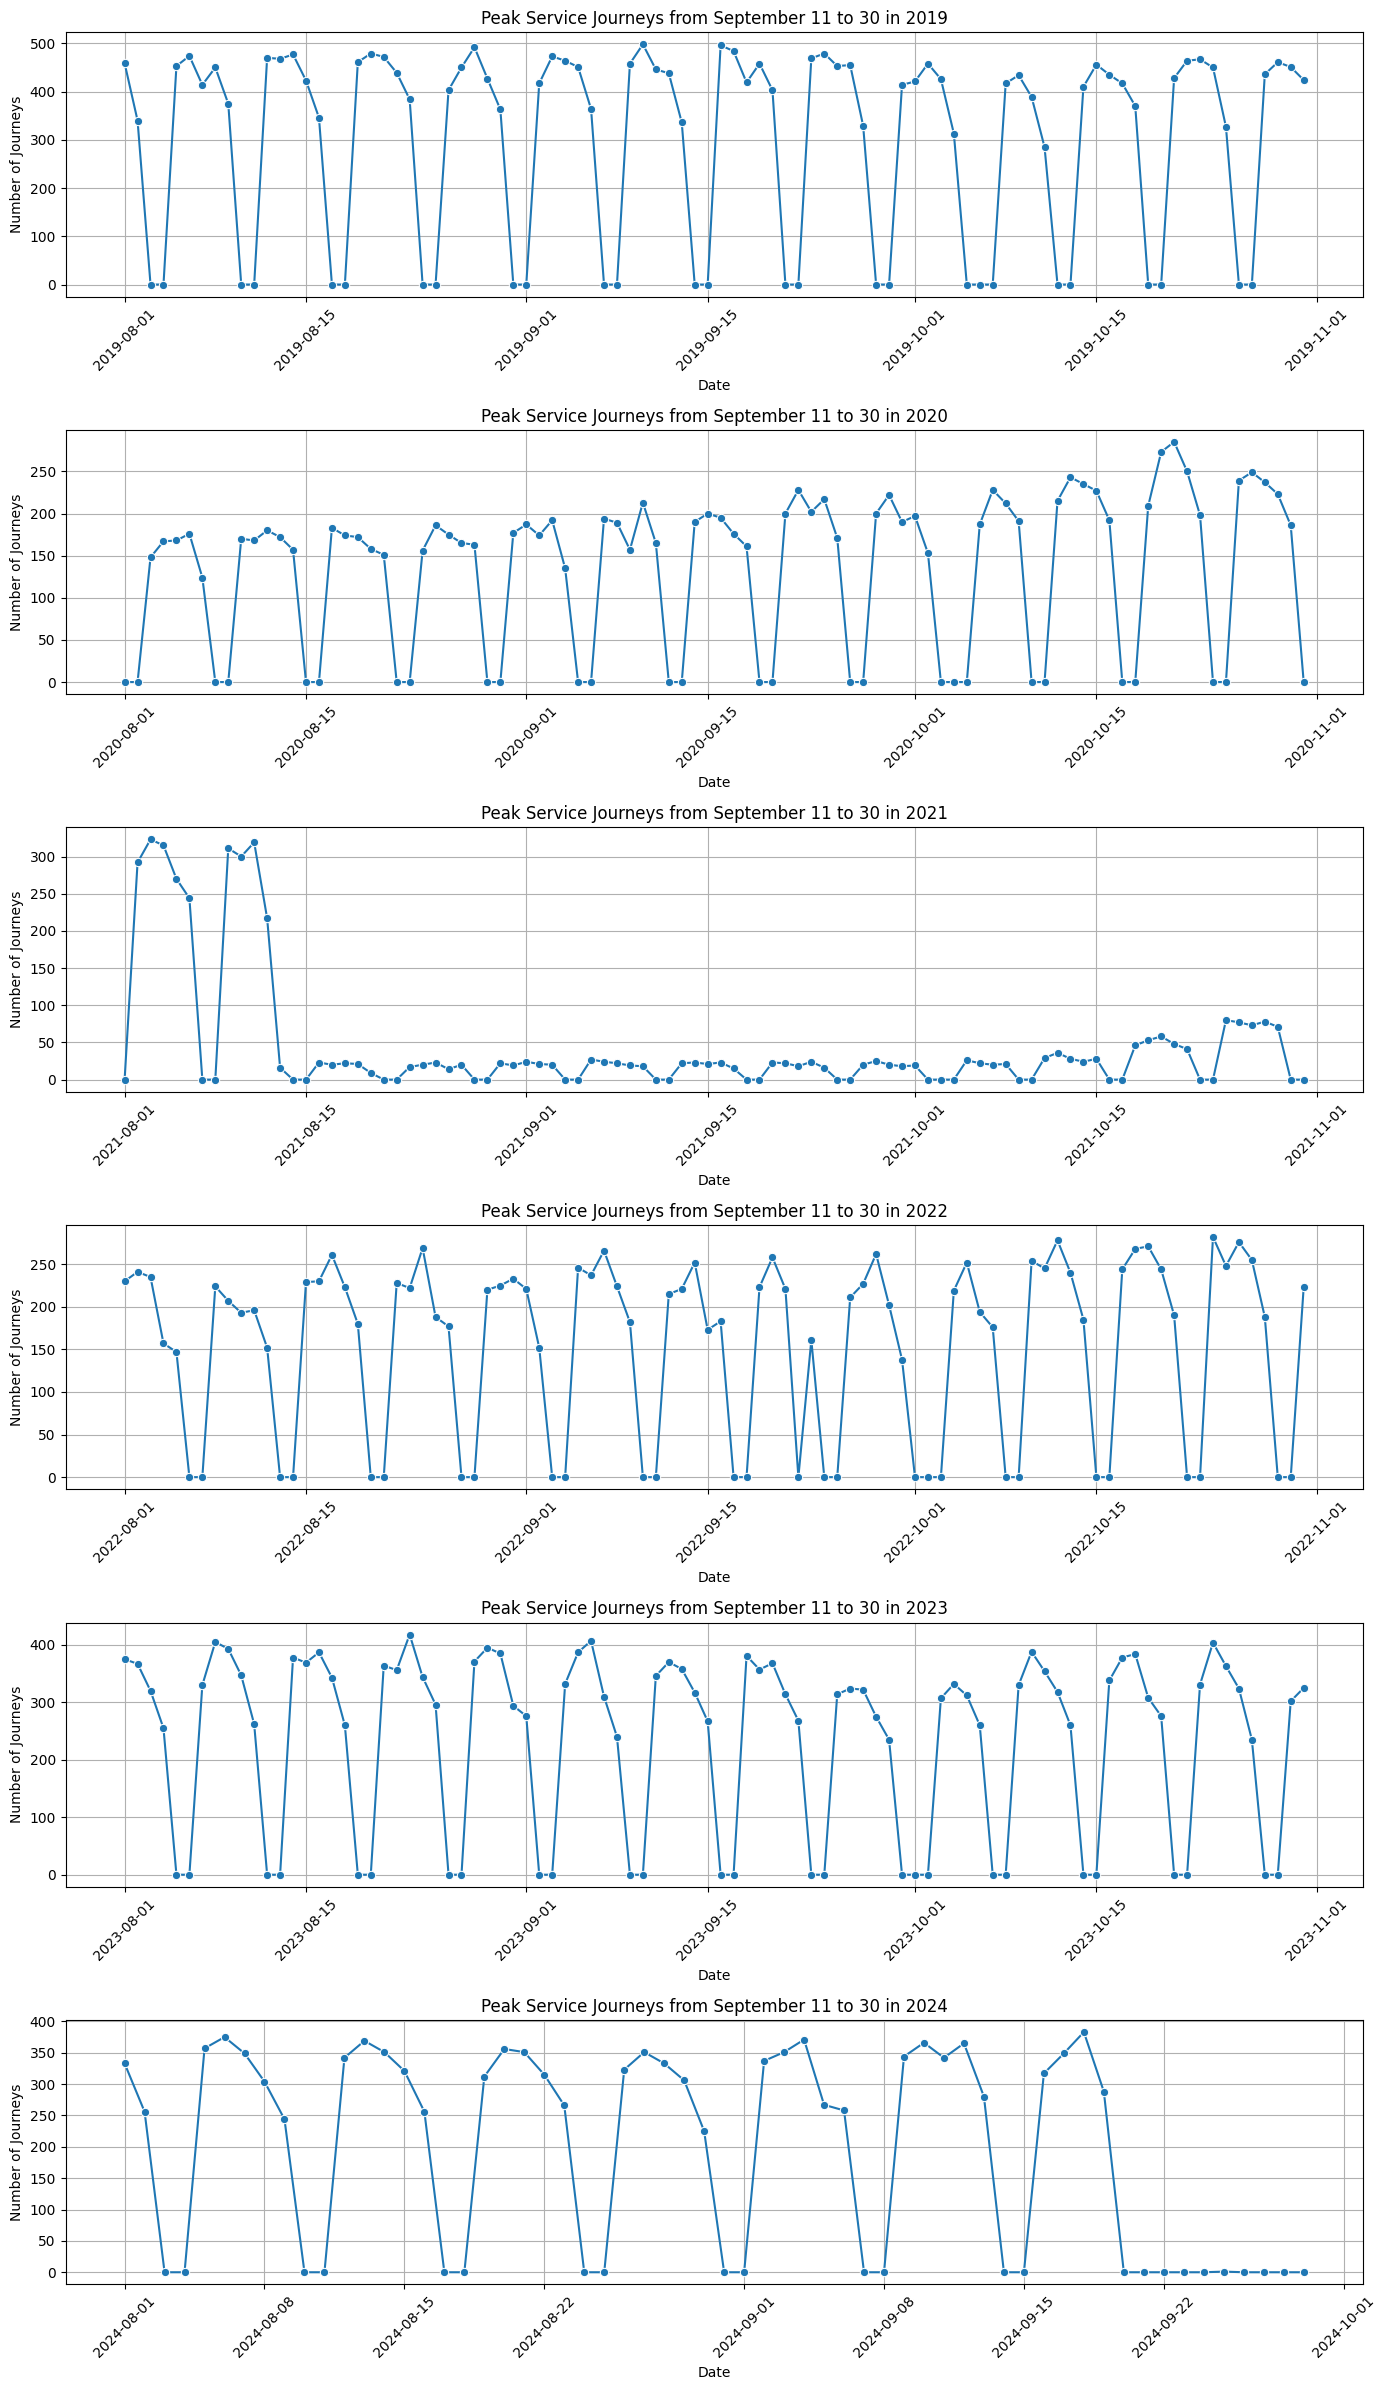

In [66]:
# Create line plots for each year for the filtered data using Seaborn
plt.figure(figsize=(14, len(years) * 4))  # Adjust figure size based on number of years
for i, year in enumerate(sorted(years)):
    plt.subplot(len(years), 1, i + 1)  # Create a subplot for each year
    year_data = data_filtered[data_filtered['Year'] == year]

    # Plot the 'Peak Service' journeys for September days 11-30 using Seaborn
    sns.lineplot(x=year_data.index, y=year_data['Peak Service'], marker='o')

    # Set title and labels
    plt.title(f'Peak Service Journeys from September 11 to 30 in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Journeys')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

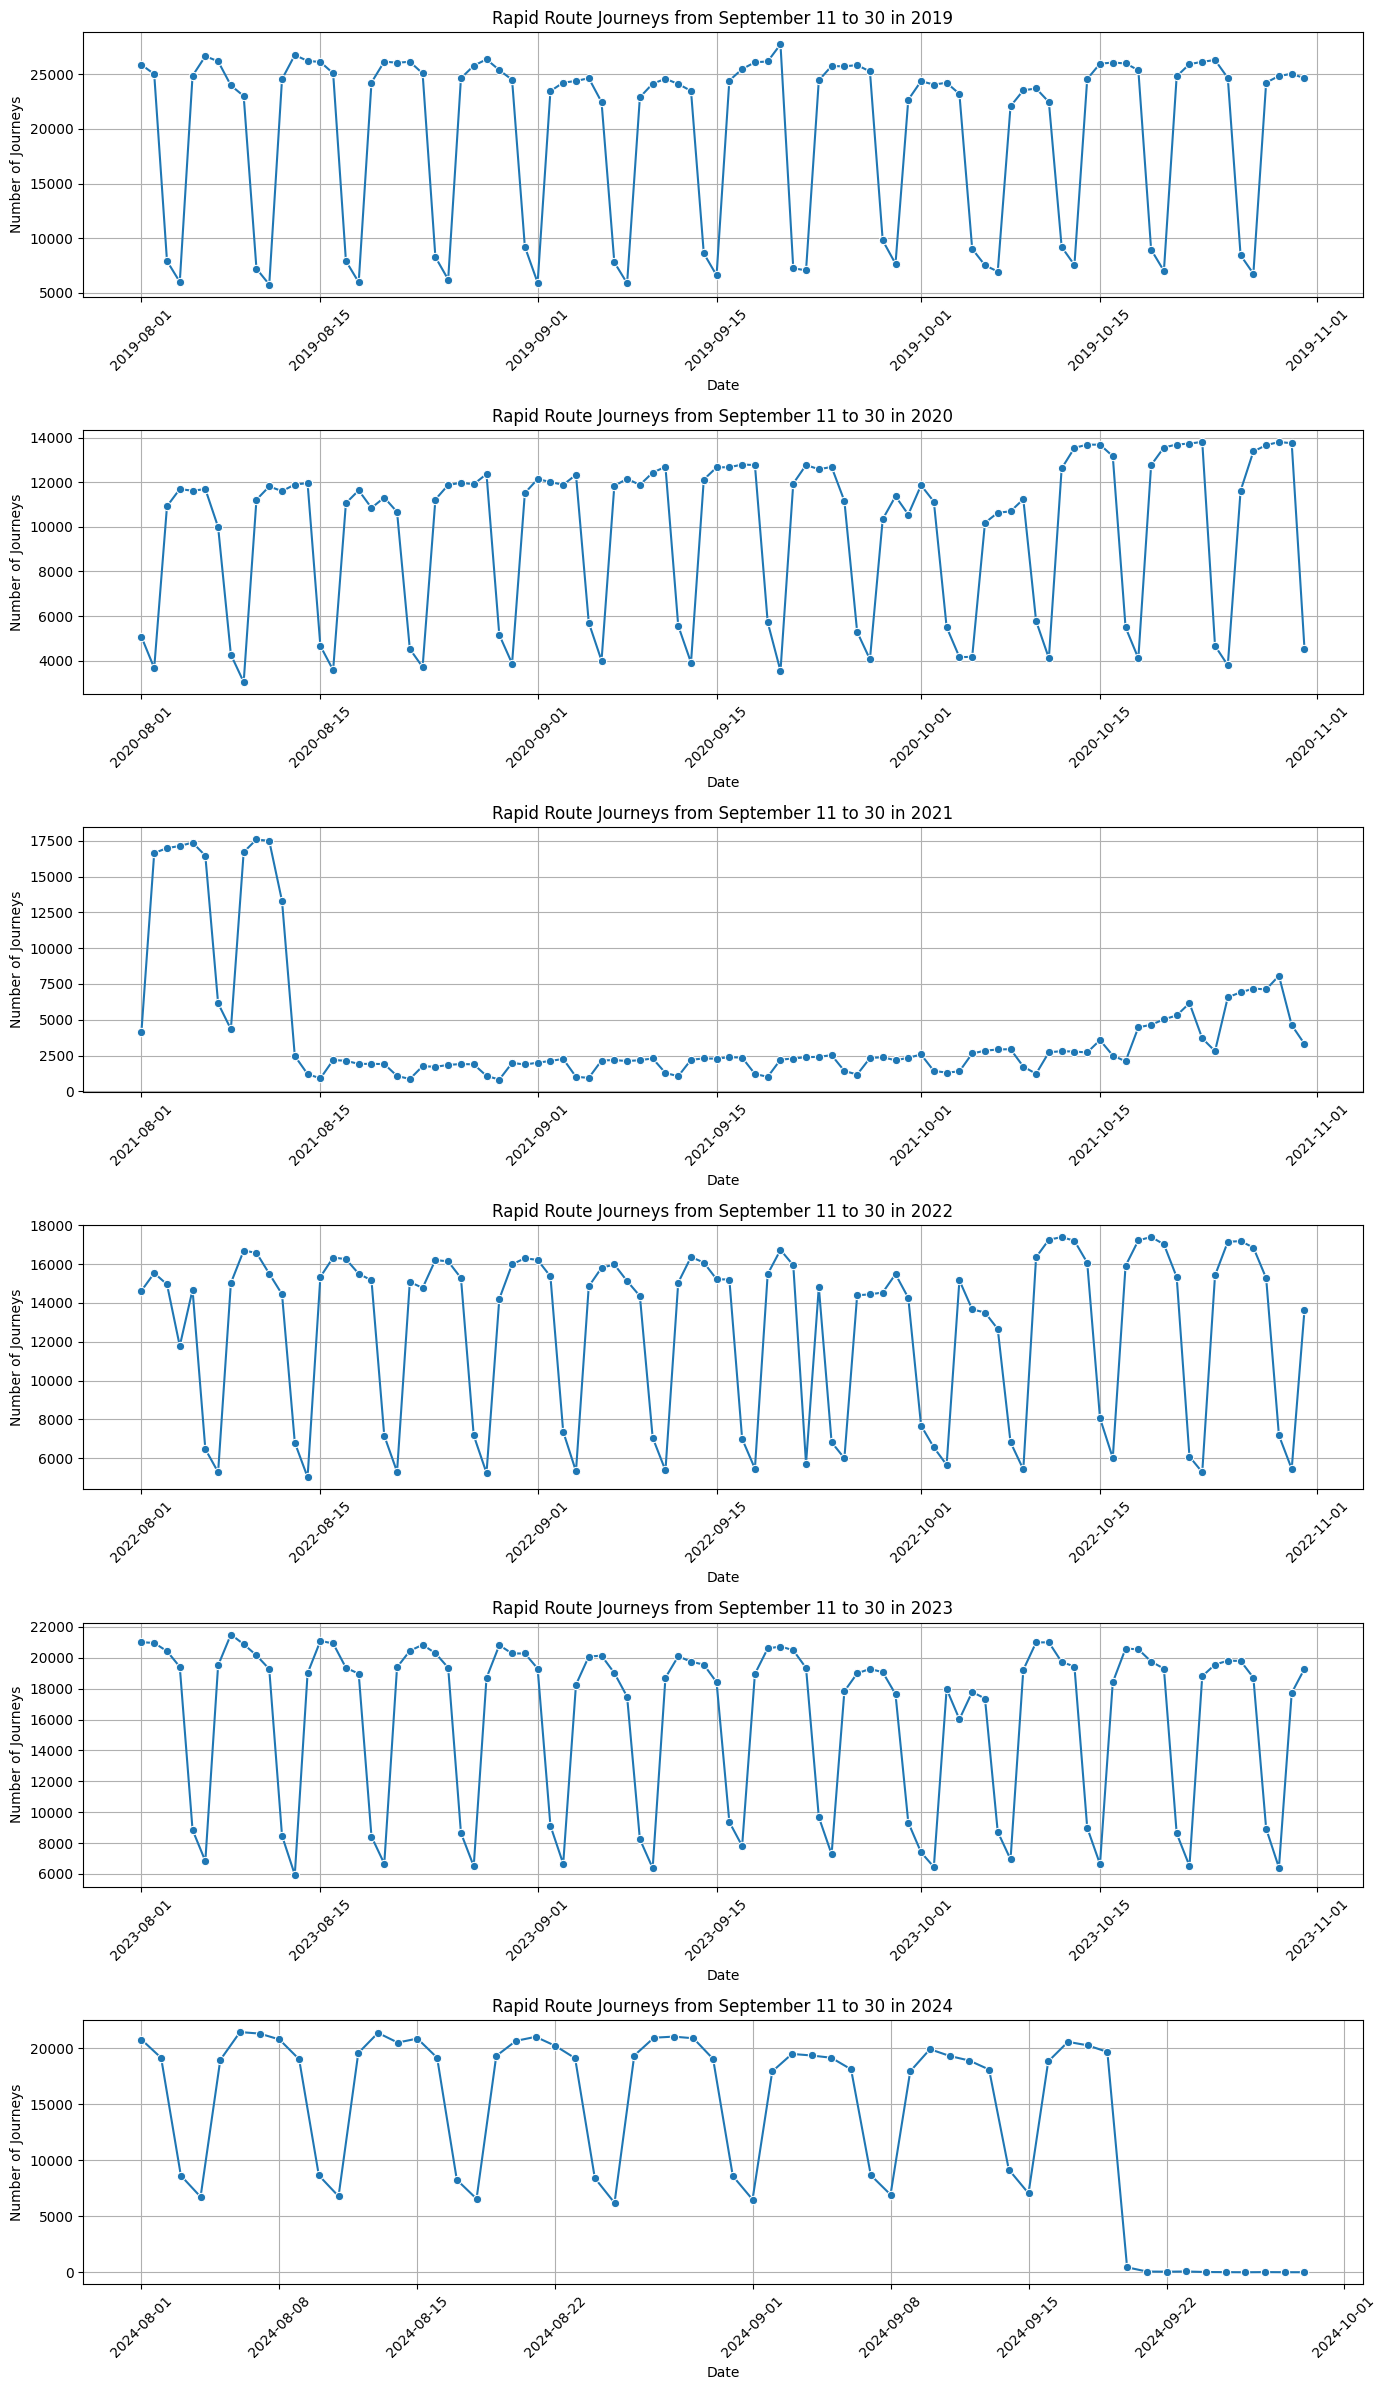

In [67]:
# Create line plots for each year for the filtered data using Seaborn
plt.figure(figsize=(14, len(years) * 4))  # Adjust figure size based on number of years
for i, year in enumerate(sorted(years)):
    plt.subplot(len(years), 1, i + 1)  # Create a subplot for each year
    year_data = data_filtered[data_filtered['Year'] == year]

    # Plot the 'Rapid Route' journeys for September days 11-30 using Seaborn
    sns.lineplot(x=year_data.index, y=year_data['Rapid Route'], marker='o')

    # Set title and labels
    plt.title(f'Rapid Route Journeys from September 11 to 30 in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Journeys')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

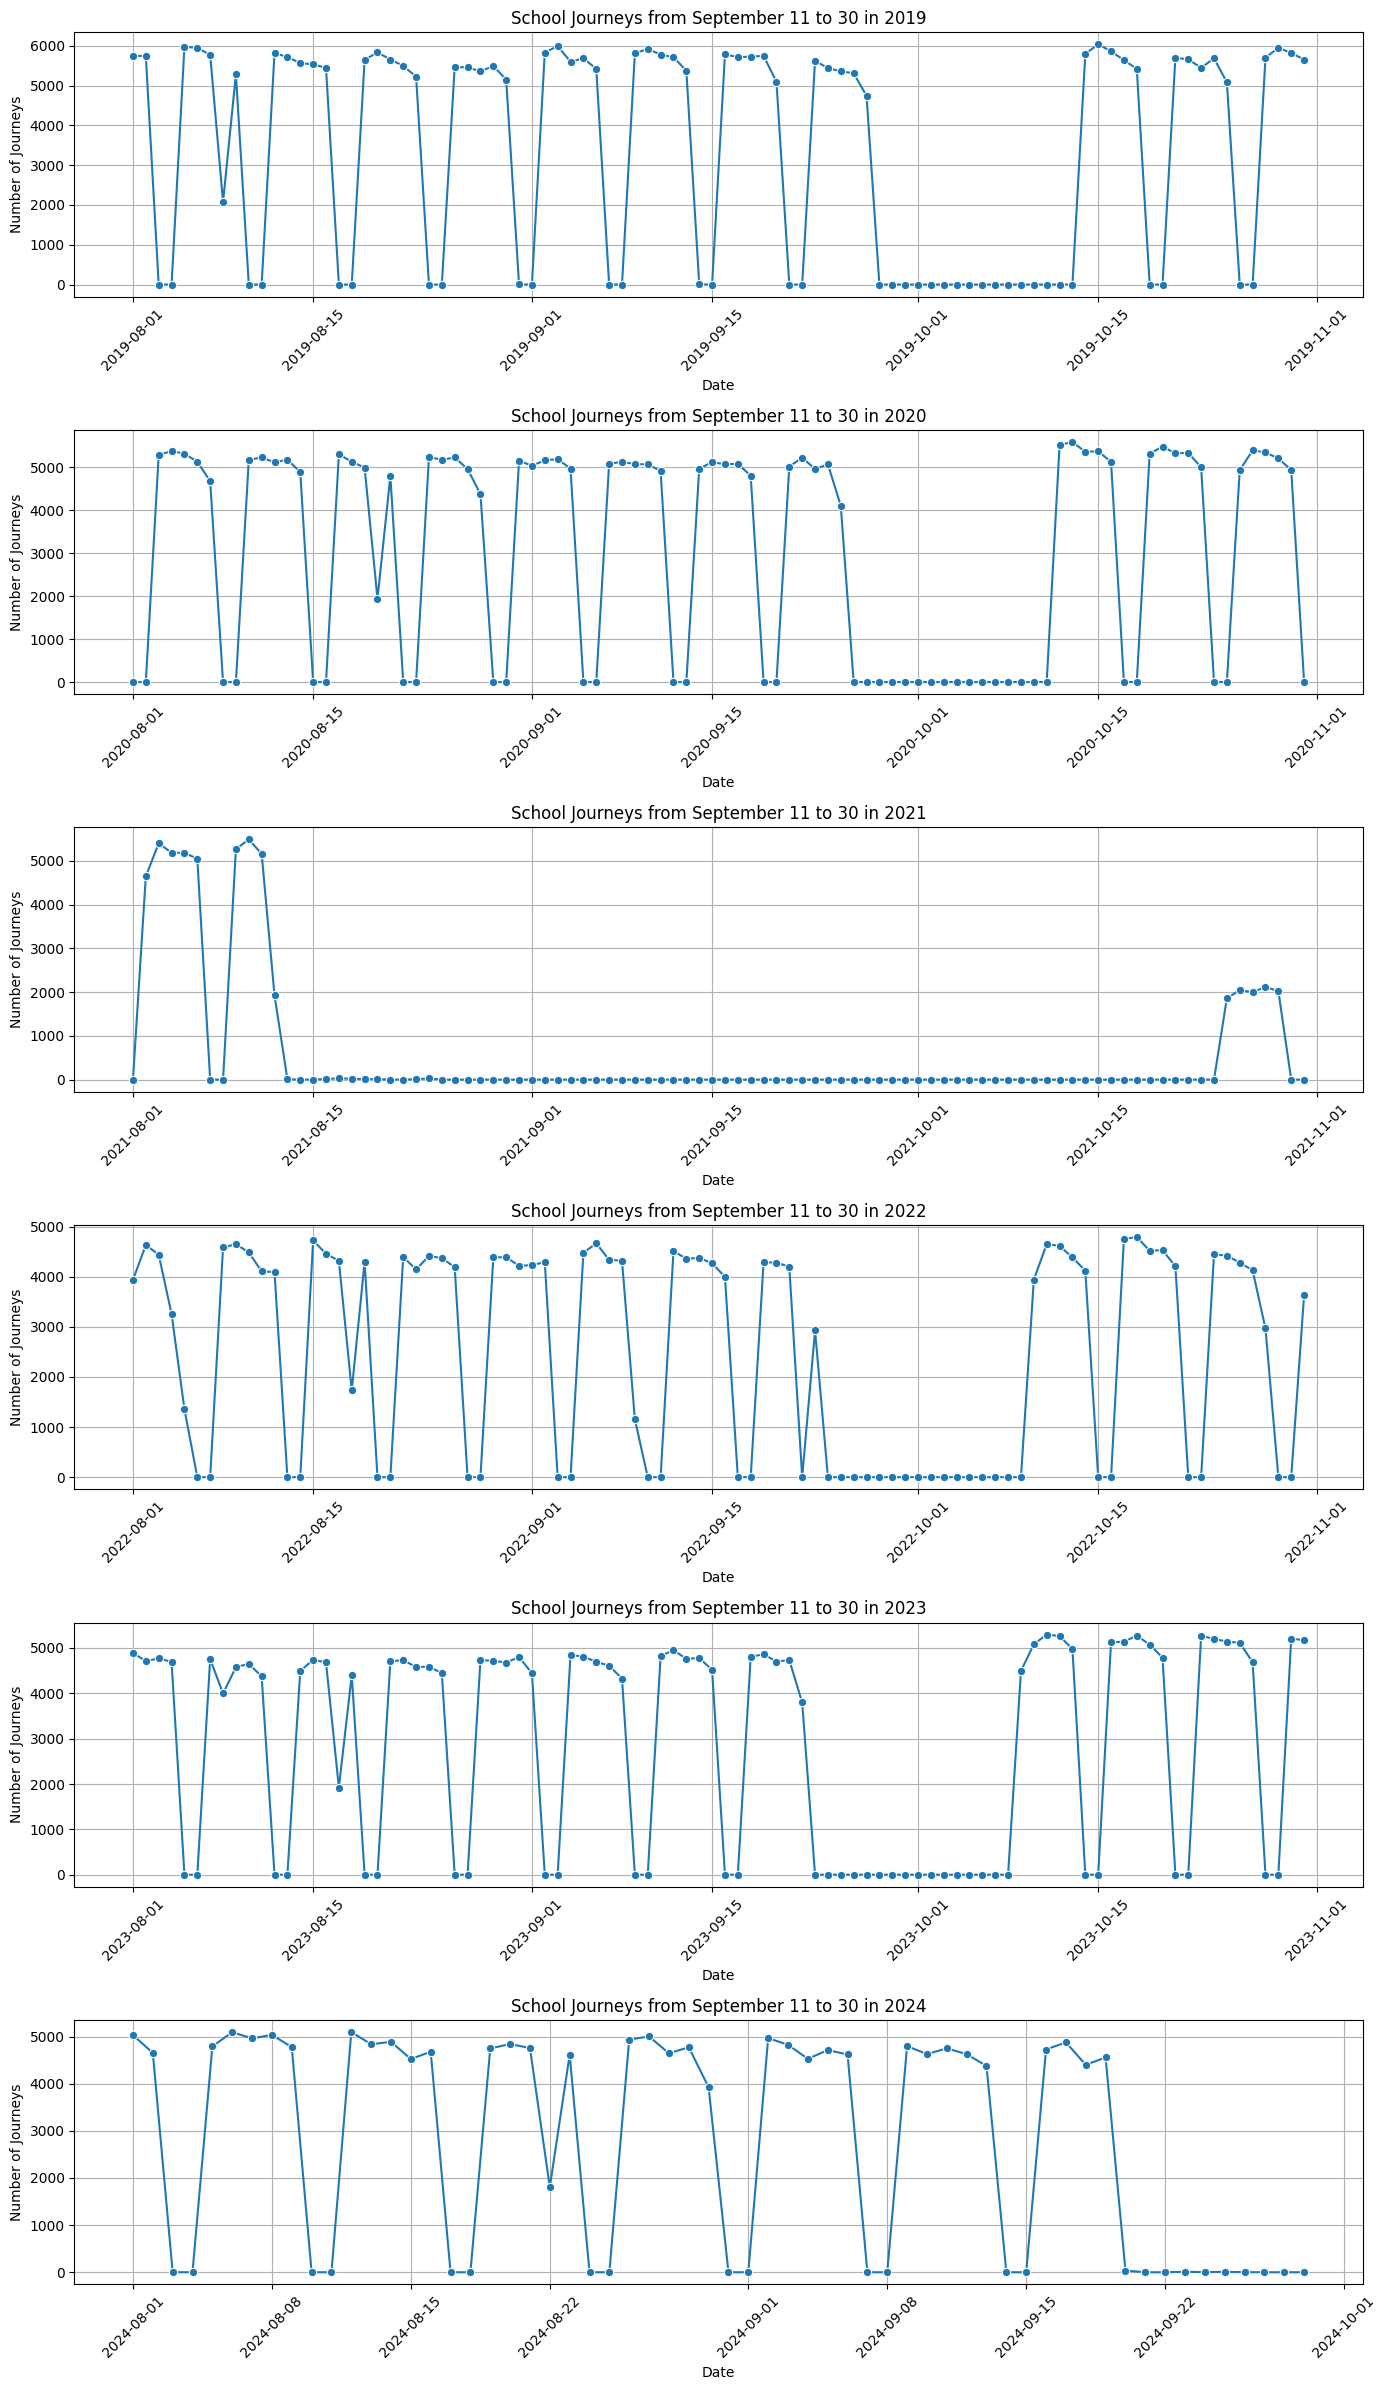

In [68]:
# Create line plots for each year for the filtered data using Seaborn
plt.figure(figsize=(14, len(years) * 4))  # Adjust figure size based on number of years
for i, year in enumerate(sorted(years)):
    plt.subplot(len(years), 1, i + 1)  # Create a subplot for each year
    year_data = data_filtered[data_filtered['Year'] == year]

    # Plot the 'School' journeys for September days 11-30 using Seaborn
    sns.lineplot(x=year_data.index, y=year_data['School'], marker='o')

    # Set title and labels
    plt.title(f'School Journeys from September 11 to 30 in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Journeys')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

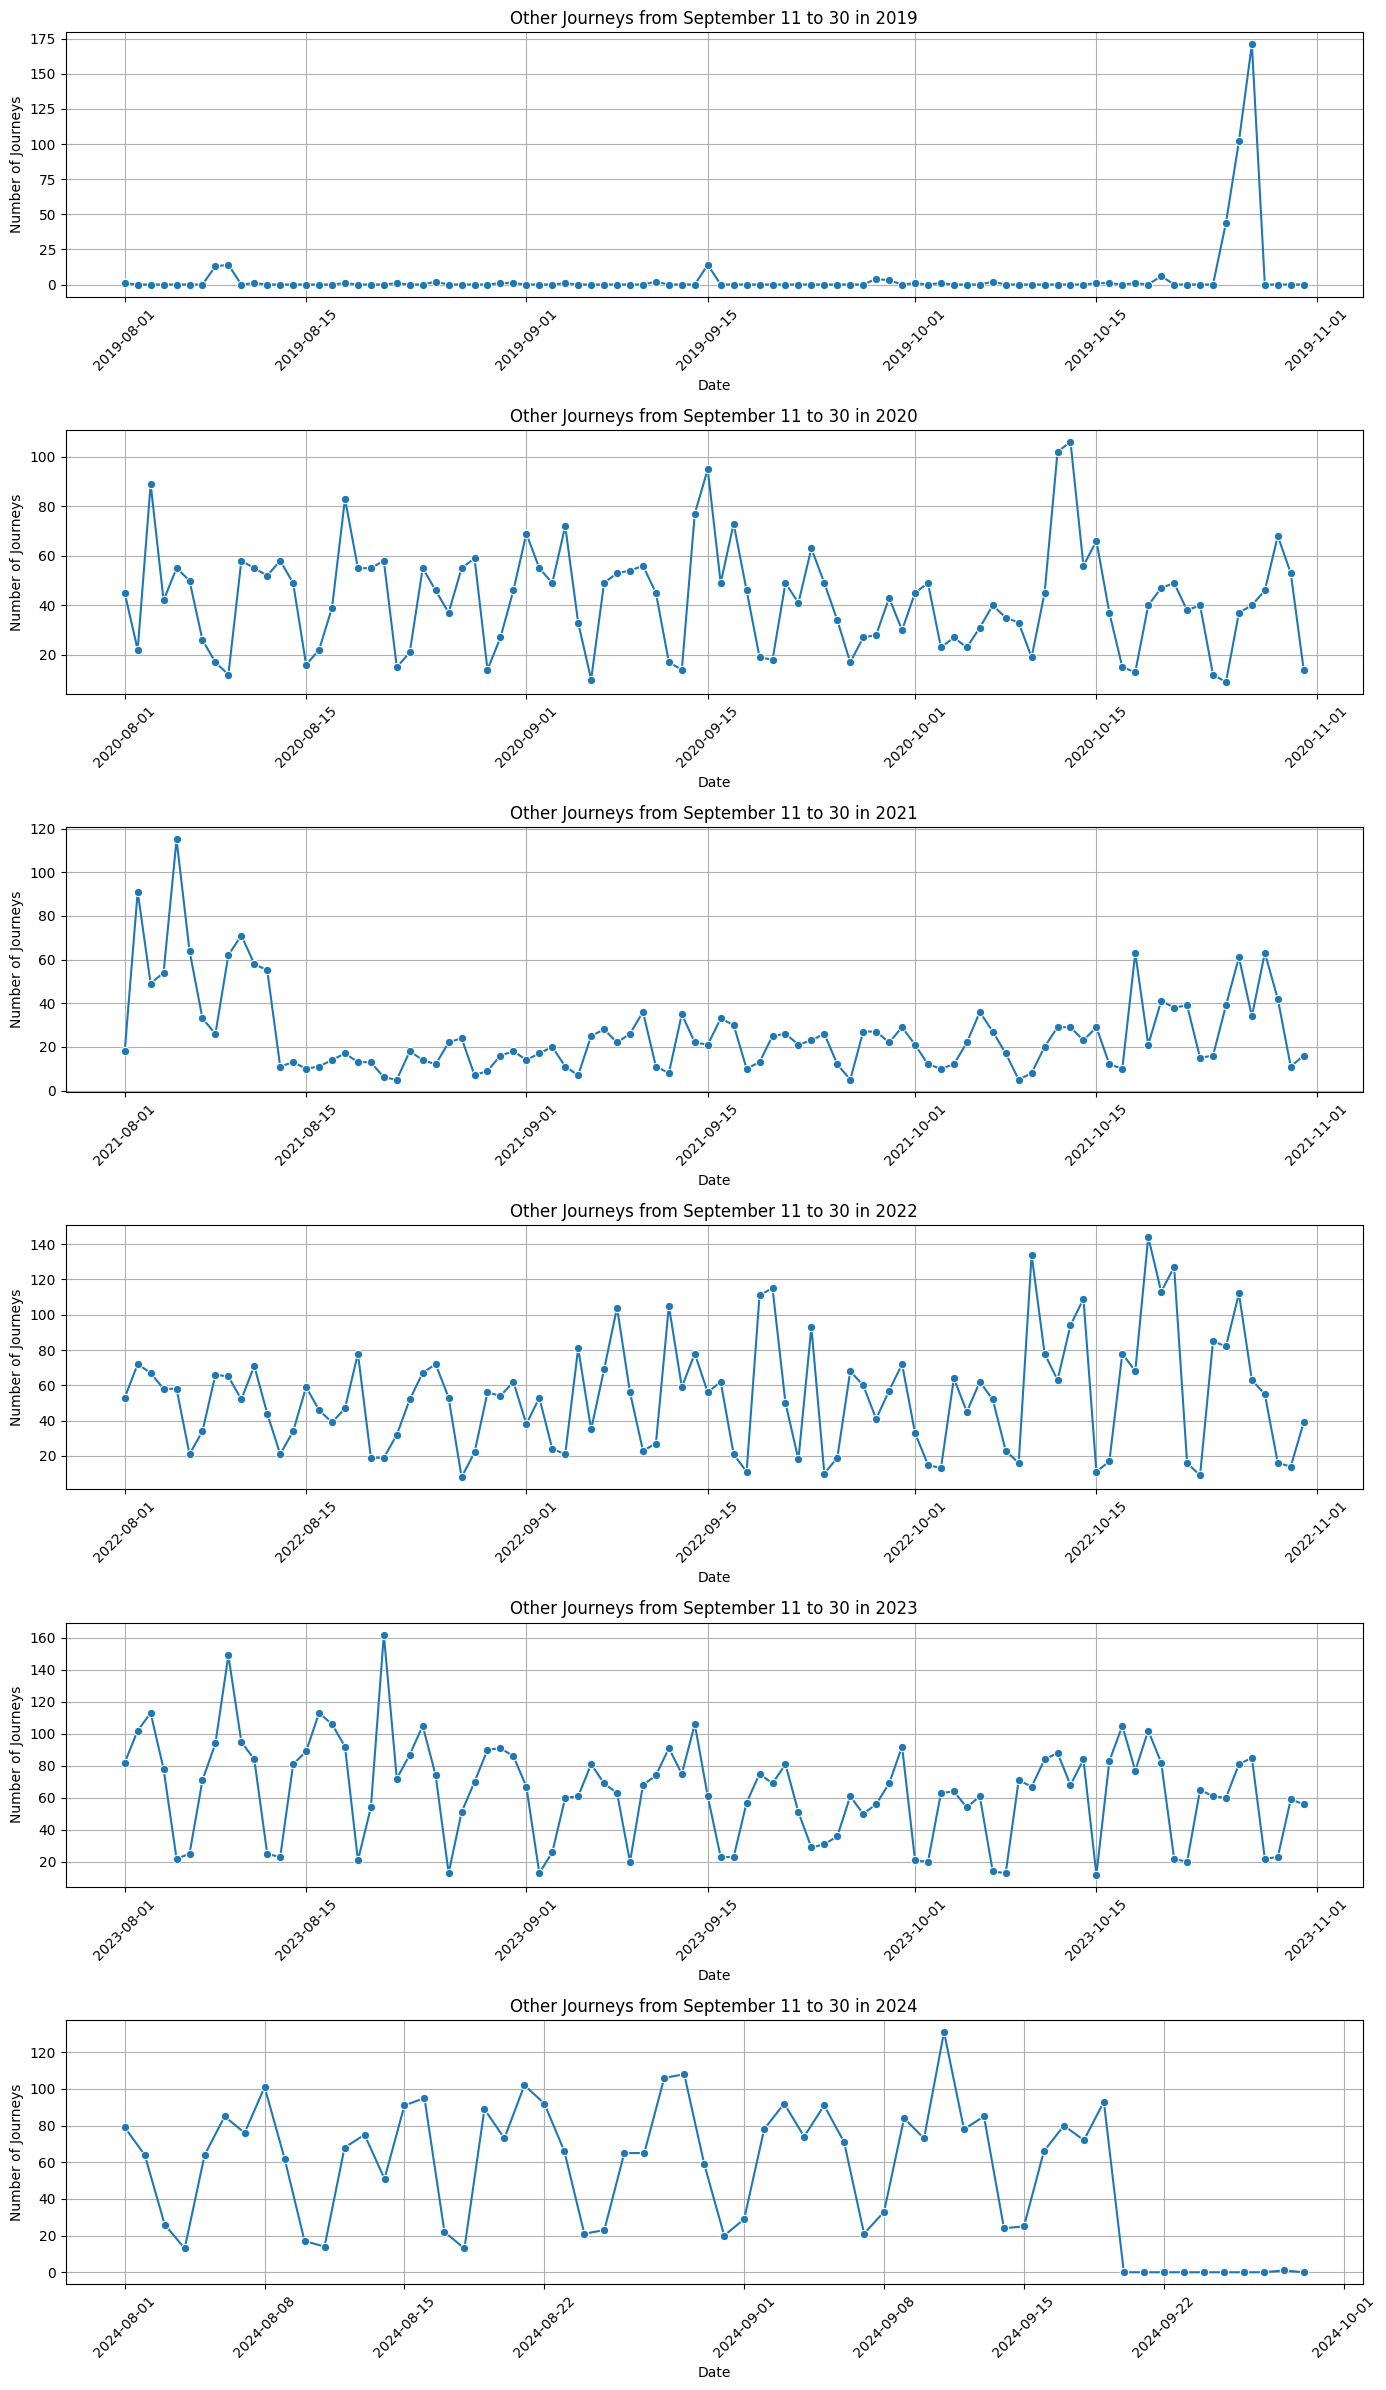

In [69]:
# Create line plots for each year for the filtered data using Seaborn
plt.figure(figsize=(14, len(years) * 4))  # Adjust figure size based on number of years
for i, year in enumerate(sorted(years)):
    plt.subplot(len(years), 1, i + 1)  # Create a subplot for each year
    year_data = data_filtered[data_filtered['Year'] == year]

    # Plot the 'Others' journeys for September days 11-30 using Seaborn
    sns.lineplot(x=year_data.index, y=year_data['Other'], marker='o')

    # Set title and labels
    plt.title(f'Other Journeys from September 11 to 30 in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Journeys')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

In [70]:
data_filtered

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Year,Month,Day
Date,,,,,,,,,
2024-08-30,16436,10705,225,19026,3925,59.0,2024,8,30
2023-09-15,15499,10671,267,18421,4519,61.0,2023,9,15
2021-09-11,820,612,0,1283,0,11.0,2021,9,11
2023-08-29,16332,11502,395,20819,4718,90.0,2023,8,29
2019-09-30,14148,11666,414,22670,0,0.0,2019,9,30
...,...,...,...,...,...,...,...,...,...
2022-09-11,2040,4185,0,5374,0,27.0,2022,9,11
2024-09-01,2448,4364,0,6487,0,29.0,2024,9,1
2021-09-24,2510,1025,16,2530,0,26.0,2021,9,24


In [71]:
# prompt: sort the data_filtered by date from oldest date to new date

data_filtered = data_filtered.sort_index()

In [72]:
data_filtered

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Year,Month,Day
Date,,,,,,,,,
2019-08-01,19950,12601,459,25864,5754,1.0,2019,8,1
2019-08-02,18953,12744,340,25010,5738,0.0,2019,8,2
2019-08-03,5447,7090,0,7922,0,0.0,2019,8,3
2019-08-04,3792,4595,0,6009,0,0.0,2019,8,4
2019-08-05,18527,11891,453,24856,5978,0.0,2019,8,5
...,...,...,...,...,...,...,...,...,...
2024-09-25,21,0,1,10,8,0.0,2024,9,25
2024-09-26,9,0,0,0,2,0.0,2024,9,26
2024-09-27,6,0,0,13,0,0.0,2024,9,27


In [73]:
data_filtered.to_csv('data_filtered.csv')

## **Prediction Using the Prophet model**

In [74]:
!pip install prophet

In [78]:
from prophet import Prophet

forecasts=[]

for column in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']:
  data = data_filtered = data[data['Year'].isin([2024])]

  route_data = data[[column]].reset_index()
  route_data.columns = ['ds', 'y']

  model = Prophet()

  model.fit(route_data)

  future_dates = model.make_future_dataframe(periods=30 + 1, freq='D', include_history=True)  # Adding 1 to include the start date
  future_dates = future_dates[future_dates['ds'] >= pd.to_datetime('2024-09-29')].reset_index(drop=True)[:30]  #Filter and reset index

  forecast_routes = model.predict(future_dates)
  forecast = forecast_routes[['ds', 'yhat']].copy()
  forecast.rename(columns={'yhat': column}, inplace=True)

    # Append the forecast to the list
  forecasts.append(forecast)

# Combine all forecasts into a single DataFrame
forecast_df = forecasts[0]

# Merge subsequent DataFrames
for i in range(1, len(forecasts)):
    forecast_df = forecast_df.merge(forecasts[i], on='ds', how='outer')

forecast_df

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqad_jyj/vymypsjn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqad_jyj/jez0gtnr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76640', 'data', 'file=/tmp/tmpsqad_jyj/vymypsjn.json', 'init=/tmp/tmpsqad_jyj/jez0gtnr.json', 'output', 'file=/tmp/tmpsqad_jyj/prophet_model3mrnwulq/prophet_model-20241028064234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:42:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:42:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

,ds,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,2024-09-29,1616.225933,3151.756509,-20.210340,4861.882616,348.173145,12.854999
1,2024-09-30,12286.832664,7754.243223,270.800560,14651.298973,3440.846250,55.962328
2,2024-10-01,14864.989832,9256.562766,333.202522,17606.262458,4181.652892,71.206971
3,2024-10-02,14999.005864,9317.190224,335.764832,17534.646999,4285.688638,72.857567
4,2024-10-03,14557.733387,8980.224607,283.329245,16987.102063,4208.470590,74.713234
5,2024-10-04,13083.111873,8388.860315,210.367693,15133.092638,3801.899720,65.462888
6,2024-10-05,3289.828525,4714.746564,-21.460540,6555.092218,365.630768,12.504861
7,2024-10-06,1533.631355,3047.452641,-21.559029,4751.862210,365.154261,12.463432
8,2024-10-07,12204.238086,7649.939355,269.451870,14541.278567,3457.827367,55.570761
9,2024-10-08,14782.395253,9152.258898,331.853833,17496.242053,4198.634009,70.815404


In [80]:
forecast_df.rename(columns={'ds': 'Date'}, inplace=True)

# **Forecast for Next 7 days and the prediction for next 30 days**


In [95]:
# Convert float columns to int and replace negative values with 0
for col in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']:
    forecast_df[col] = forecast_df[col].astype(int)
    forecast_df.loc[forecast_df[col] < 0, col] = 0
forecast_df.head(7)

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Year,Month,Day
Date,,,,,,,,,
2024-09-29,1616,3151,0,4861,348,12,2024,9,29
2024-09-30,12286,7754,270,14651,3440,55,2024,9,30
2024-10-01,14864,9256,333,17606,4181,71,2024,10,1
2024-10-02,14999,9317,335,17534,4285,72,2024,10,2
2024-10-03,14557,8980,283,16987,4208,74,2024,10,3
2024-10-04,13083,8388,210,15133,3801,65,2024,10,4
2024-10-05,3289,4714,0,6555,365,12,2024,10,5


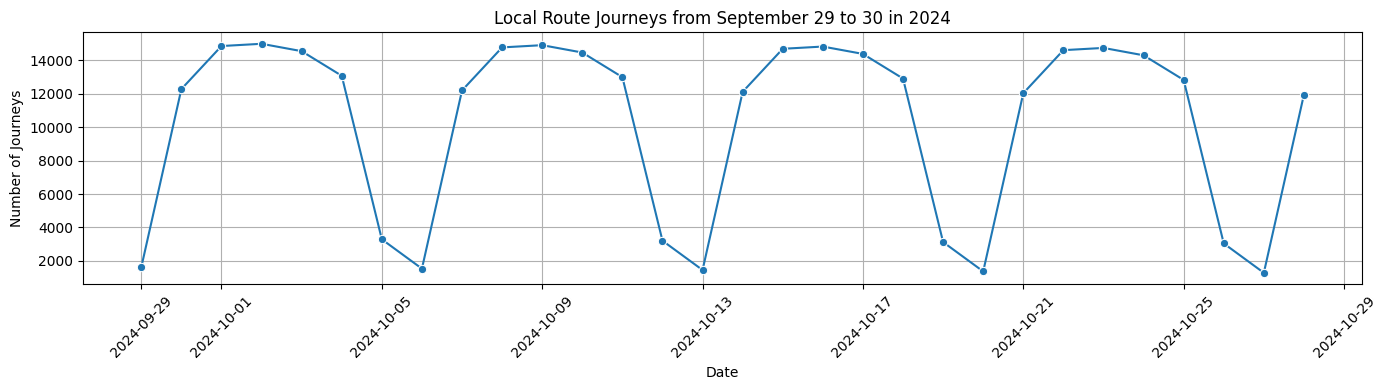

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

forecast_df['Year'] = forecast_df.index.year
forecast_df['Month'] = forecast_df.index.month
forecast_df['Day'] = forecast_df.index.day


data_filtered = forecast_df[forecast_df['Month'].isin([8, 9, 10])]


years = data_filtered['Year'].unique()

# Create line plots for each year for the filtered data using Seaborn
plt.figure(figsize=(14, len(years) * 4))  # Adjust figure size based on number of years
for i, year in enumerate(sorted(years)):
    plt.subplot(len(years), 1, i + 1)  # Create a subplot for each year
    year_data = data_filtered[data_filtered['Year'] == year]

    sns.lineplot(x=year_data.index, y=year_data['Local Route'], marker='o')

    # Set title and labels
    plt.title(f'Local Route Journeys from September 29 to 30 in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Journeys')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between plots
plt.show()


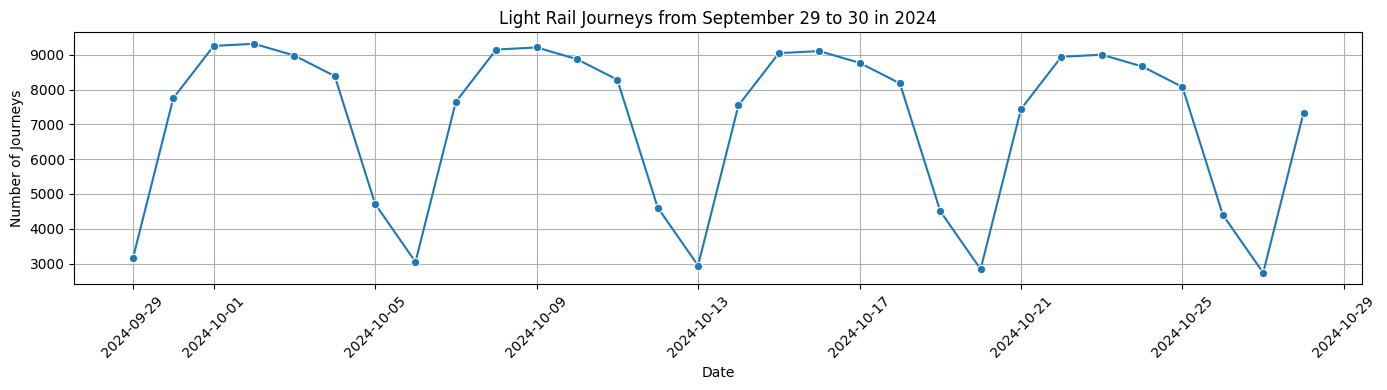

In [89]:
plt.figure(figsize=(14, len(years) * 4))  # Adjust figure size based on number of years
for i, year in enumerate(sorted(years)):
    plt.subplot(len(years), 1, i + 1)  # Create a subplot for each year
    year_data = data_filtered[data_filtered['Year'] == year]

    sns.lineplot(x=year_data.index, y=year_data['Light Rail'], marker='o')

    # Set title and labels
    plt.title(f'Light Rail Journeys from September 29 to 30 in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Journeys')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

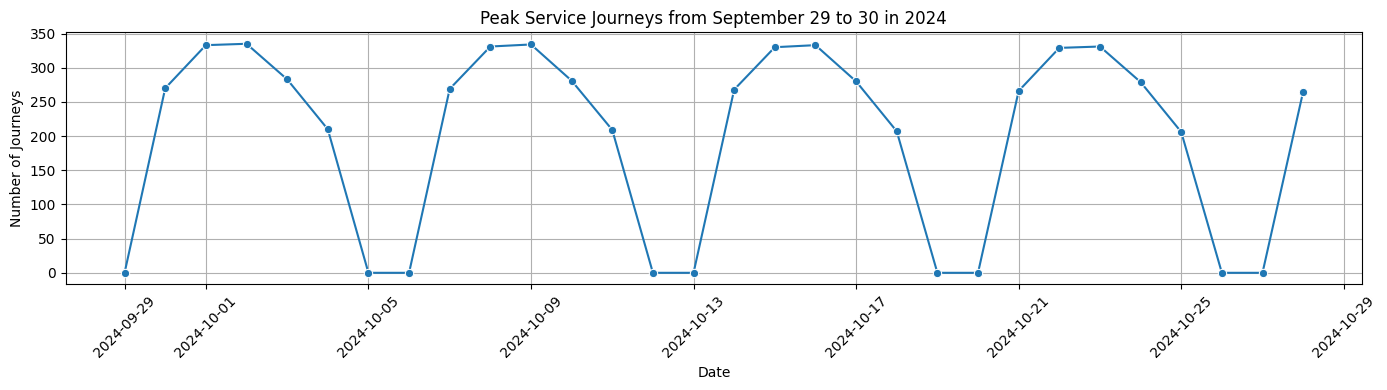

In [91]:
plt.figure(figsize=(14, len(years) * 4))  # Adjust figure size based on number of years
for i, year in enumerate(sorted(years)):
    plt.subplot(len(years), 1, i + 1)  # Create a subplot for each year
    year_data = data_filtered[data_filtered['Year'] == year]

    sns.lineplot(x=year_data.index, y=year_data['Peak Service'], marker='o')

    # Set title and labels
    plt.title(f'Peak Service Journeys from September 29 to 30 in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Journeys')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

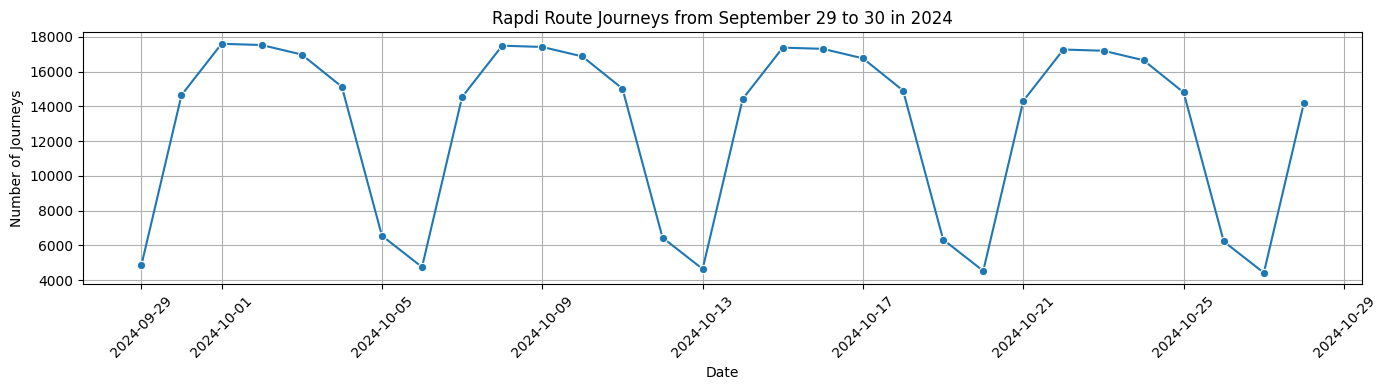

In [92]:
plt.figure(figsize=(14, len(years) * 4))  # Adjust figure size based on number of years
for i, year in enumerate(sorted(years)):
    plt.subplot(len(years), 1, i + 1)  # Create a subplot for each year
    year_data = data_filtered[data_filtered['Year'] == year]

    sns.lineplot(x=year_data.index, y=year_data['Rapid Route'], marker='o')

    # Set title and labels
    plt.title(f'Rapdi Route Journeys from September 29 to 30 in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Journeys')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

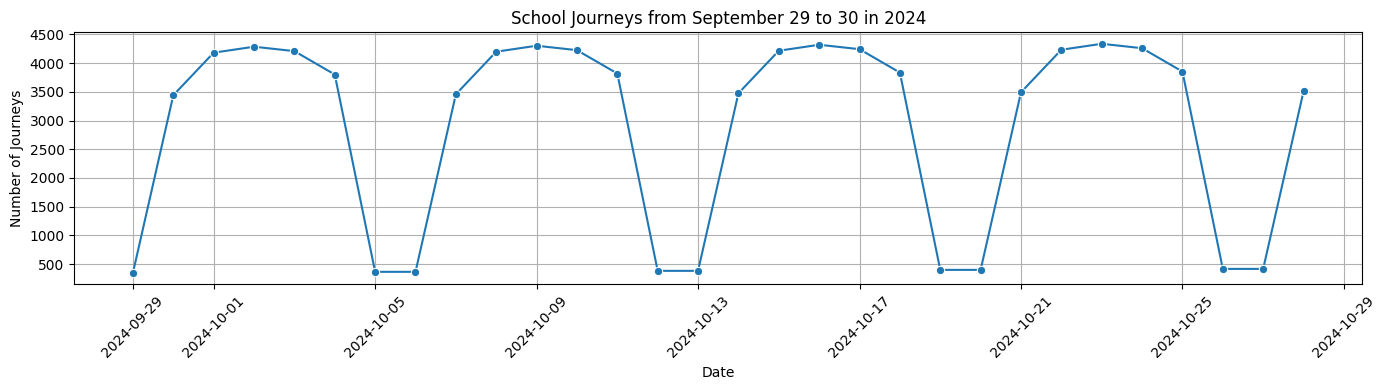

In [93]:
plt.figure(figsize=(14, len(years) * 4))  # Adjust figure size based on number of years
for i, year in enumerate(sorted(years)):
    plt.subplot(len(years), 1, i + 1)  # Create a subplot for each year
    year_data = data_filtered[data_filtered['Year'] == year]

    sns.lineplot(x=year_data.index, y=year_data['School'], marker='o')

    # Set title and labels
    plt.title(f'School Journeys from September 29 to 30 in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Journeys')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

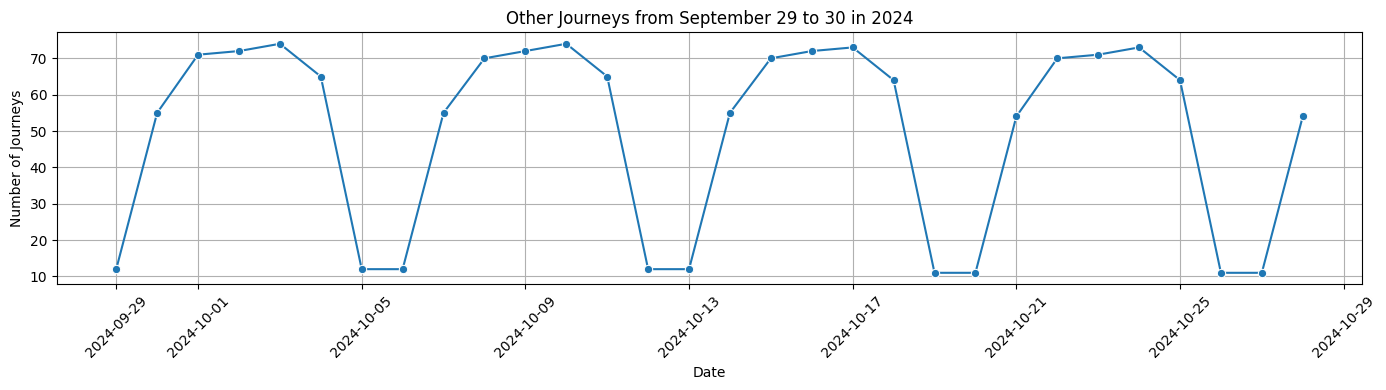

In [94]:
plt.figure(figsize=(14, len(years) * 4))  # Adjust figure size based on number of years
for i, year in enumerate(sorted(years)):
    plt.subplot(len(years), 1, i + 1)  # Create a subplot for each year
    year_data = data_filtered[data_filtered['Year'] == year]

    sns.lineplot(x=year_data.index, y=year_data['Other'], marker='o')

    # Set title and labels
    plt.title(f'Other Journeys from September 29 to 30 in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Journeys')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

## **Insights and Reports**

There is a steady and constant flow in the Local Routes, Light Rail and schools
but there is many variations in the Rapid Routes and peak services because of many factors. It may be a weather, government holidays, functions or public events etc.

At some points there is continuos drop on the usage of school transport between september and october for 10 days. So that it will be like a exam holidays.

Local routes have low usage on weekends. But the rapid and peak routes are used with variation on the weekends as the people may travel to the hometowns.

I have used the prophet model for the timeseries analysis of transport usage. I have only taken the data from year 2024 because the population from year 2019 and 2024 varies a lot.

May including the data from previous years may help to find the holiday trend and usage of transport.


